In [1]:
from sympy import *
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
init_printing()

In [2]:
def nullstellen(f):
    glg = Eq(f)
    Lsg = solve(glg)
    return Lsg

def nullstellenpunkte(f):
    Lsg = nullstellen(f)
    output = []
    for lsg in Lsg:
        output.append((lsg,0))
    return output

In [3]:
def plot2d(f, a, b):
    plt.figure()
    fn = lambdify(x, f, 'numpy')
    xn = np.linspace(a,b,100)
    plt.plot(xn, fn(xn))

In [4]:
def hochpunkte(f):
    f1 = f.diff(x)
    f2 = f1.diff(x)
    glg = Eq(f1)
    candidates = solve(glg)
    lsg = []
    epsilon = 10**-16
    for cand in candidates:
        if(f2.subs(x,cand) < 0):
            lsg.append((cand, f.subs(x,cand)))
        elif(f2.subs(x,cand) == 0):
            wert = f.subs(x,cand)
            if(f.subs(x, cand - epsilon) < wert and f.subs(x, cand + epsilon) < wert):
                lsg.append((cand, wert))
    return lsg

In [5]:
def tiefpunkte(f):
    f1 = f.diff(x)
    f2 = f1.diff(x)
    glg = Eq(f1)
    candidates = solve(glg)
    lsg = []
    epsilon = 10**-16
    for cand in candidates:
        if(f2.subs(x,cand) > 0):
            lsg.append((cand, f.subs(x,cand)))
        elif(f2.subs(x,cand) == 0):
            wert = f.subs(x,cand)
            if(f.subs(x, cand - epsilon) > wert and f.subs(x, cand + epsilon) > wert):
                lsg.append((cand, wert))
    return lsg

In [6]:
def wendepunkte(f):
    f1 = f.diff(x)
    f2 = f1.diff(x)
    f3 = f2.diff(x)
    glg = Eq(f2)
    candidates = solve(glg)
    lsg = []
    epsilon = 10**-16
    for cand in candidates:
        if(not f3.subs(x,cand) == 0):
            lsg.append((cand, f.subs(x,cand)))
        elif(f3.subs(x,cand) == 0):
            wert = f1.subs(x,cand)
            cond1 = f1.subs(x, cand - epsilon) > wert and f1.subs(x, cand + epsilon) > wert
            cond2 = f1.subs(x, cand - epsilon) < wert and f1.subs(x, cand + epsilon) < wert
            if(cond1 or cond2):
                lsg.append((cand, wert))
    return lsg

In [7]:
def plotHochpunkte(f, a, b):
    hochpkt = np.array(hochpunkte(f))
    plot2d(f, a, b)
    plt.plot(hochpkt[:, 0], hochpkt[:, 1], ".g", label = 'Hochpunkt')
    plt.grid()
    plt.legend()
    
def plotTiefpunkte(f, a, b):
    tiefpkt = np.array(tiefpunkte(f))
    plot2d(f, a, b)
    plt.plot(tiefpkt[:, 0], tiefpkt[:, 1], ".r", label = 'Tiefpunkt')
    plt.grid()
    plt.legend()
    
def plotExtrempunkte(f, a, b):
    hochpkt = np.array(hochpunkte(f))
    tiefpkt = np.array(tiefpunkte(f))
    plot2d(f, a, b)
    plt.plot(hochpkt[:, 0], hochpkt[:, 1], ".g", label = 'Hochpunkt')
    plt.plot(tiefpkt[:, 0], tiefpkt[:, 1], ".r", label = 'Tiefpunkt')
    plt.grid()
    plt.legend()
    
def plotWendepunkte(f, a, b):
    wendepkt = np.array(wendepunkte(f))
    plot2d(f, a, b)
    plt.plot(wendepkt[:, 0], wendepkt[:, 1], ".k", label = 'Wendepunkt')
    plt.grid()
    plt.legend()
    
def plotNullstellen(f, a, b):
    nst = np.array(nullstellenpunkte(f))
    plot2d(f, a, b)
    plt.plot(nst[:, 0], nst[:, 1], ".r", label = 'Nullstelle')
    plt.grid()
    plt.legend()

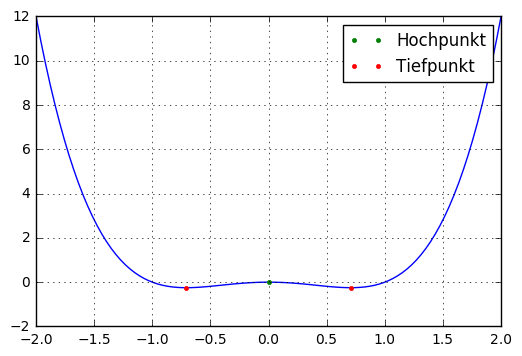

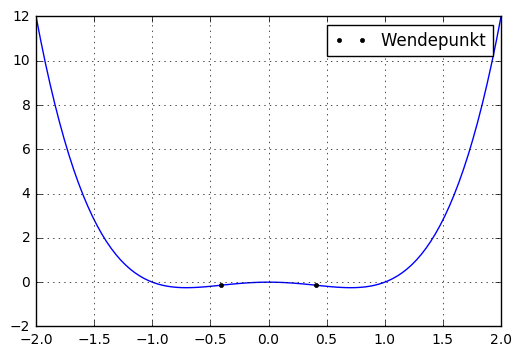

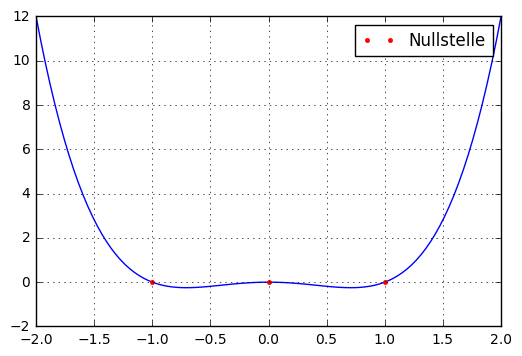

In [8]:
x = Symbol('x')
a = Symbol('a')
f = x**4-x**2
plotExtrempunkte(f, -2, 2)
plotWendepunkte(f, -2, 2)
plotNullstellen(f, -2, 2)

In [9]:
def jacobianMatrix(f, var):
    M = Matrix([f])
    return M.jacobian(var)


In [10]:
def gradient(f, var):
    if(Matrix([f]).shape[0] > 1 and Matrix([f]).shape[1] > 1):
        raise(Exception("Gradient nicht zu bestimmen"))
    return jacobianMatrix(f,var).T

In [11]:
#Hesse Matrix direkt zu bestimmen durch Sympy
#Jordan Zerlegung durch Sympy direkt zu bestimmen
#partielle Ableitungen sind die Eintraege der Jacobi Matrix
#Ableitung direkt zu bestimmen
#Riemann-Integral direkt zu bestimmen
#Grenzwert direkt zu bestimmen

In [12]:
def plot3d(f, xintervall, yintervall):
    fig = plt.figure()
    fn = lambdify((x,y), f, 'numpy')
    xn = np.linspace(xintervall[0], xintervall[1], 50)
    yn = np.linspace(yintervall[0], yintervall[1], 50)
    X,Y = np.meshgrid(xn,yn)
    Z = fn(X,Y)
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot_surface(X,Y,Z, rstride = 1, cstride = 1, cmap = plt.cm.viridis)

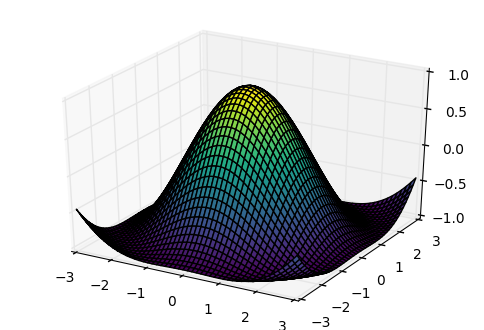

In [14]:
y = Symbol('y')
f = cos(sqrt(x**2+y**2))
plot3d(f, [-3,3],[-3,3])